<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

SONG = 3
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

16:30:19 INFO << load arm CSV.
16:30:19 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order, 4, 2)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, who_id, song_id, pf_order, 4, 2)) 
            
    return pfs

In [5]:
pfs = []
for drumer in range(1, 8 + 1):
    ppf = gogo(drumer, SONG, TRAIN_ORDER)
    pfs.append(ppf)

100%|██████████| 3/3 [01:08<00:00, 22.85s/it]


16:44:00 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
16:44:00 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


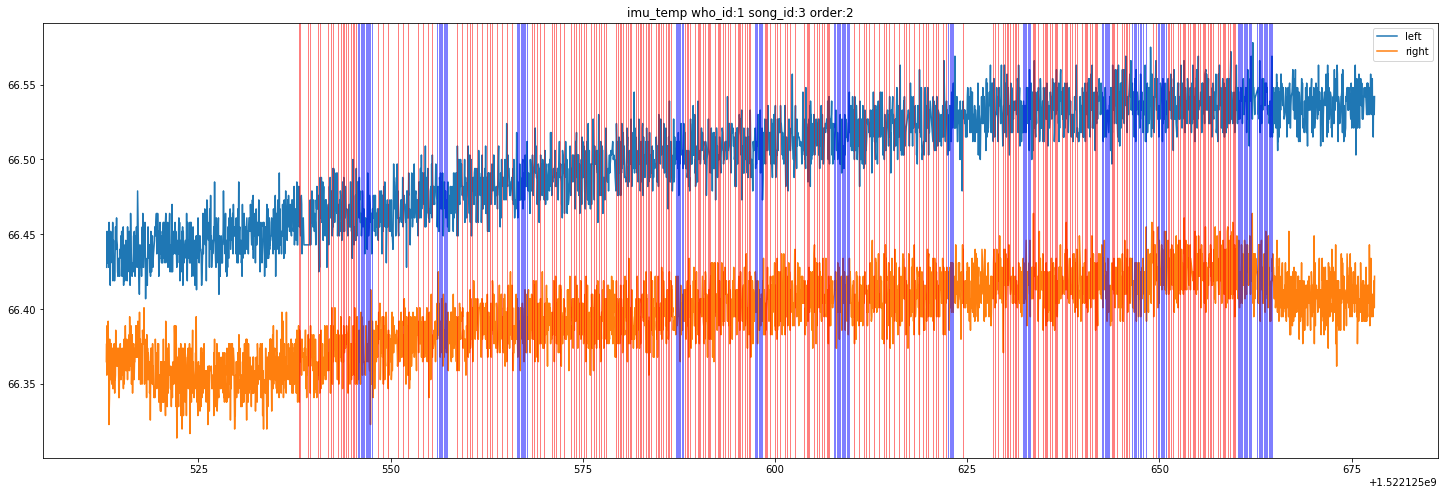

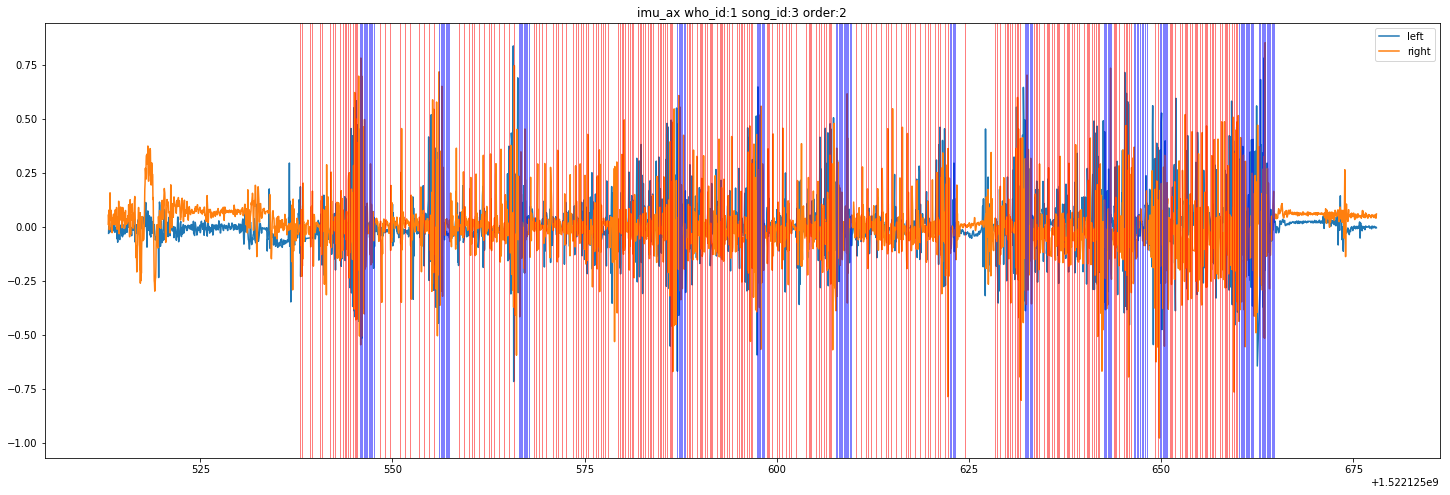

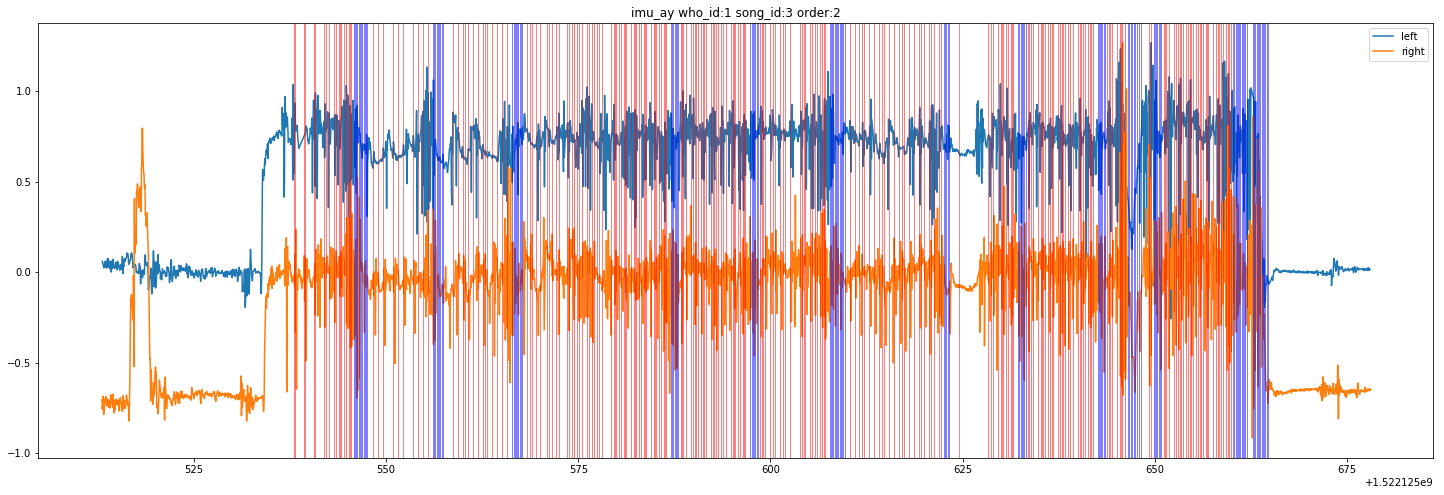

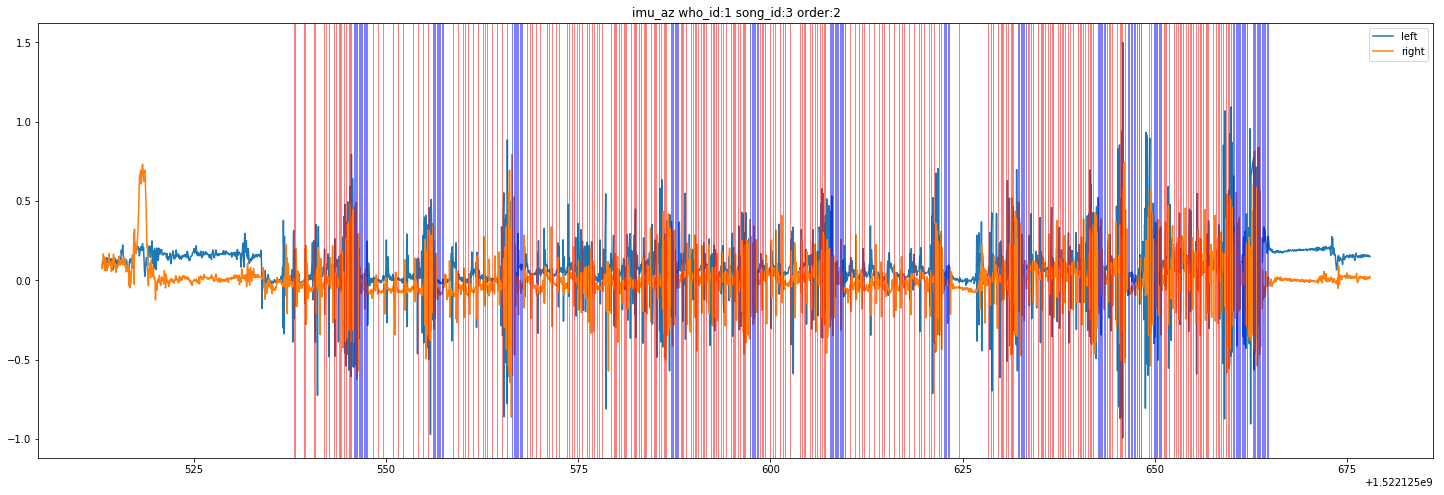

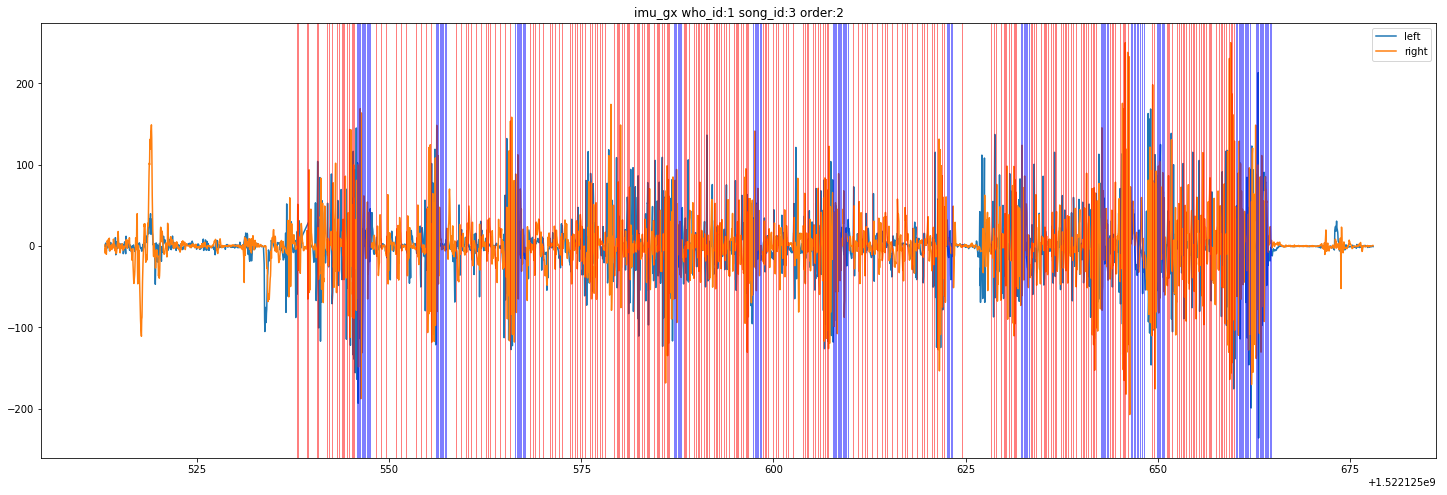

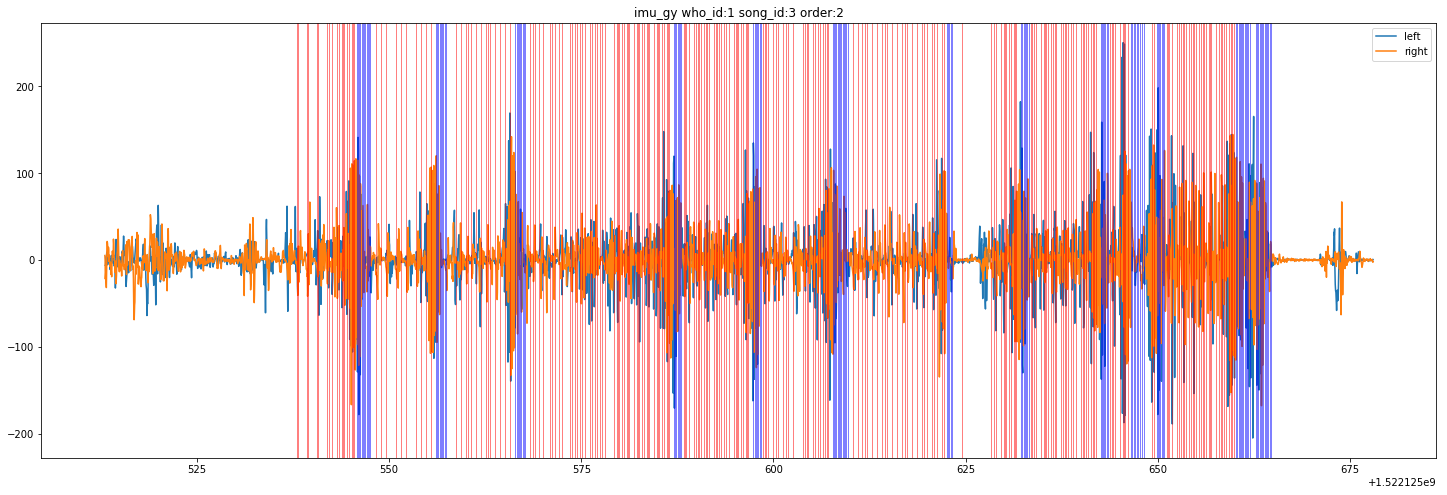

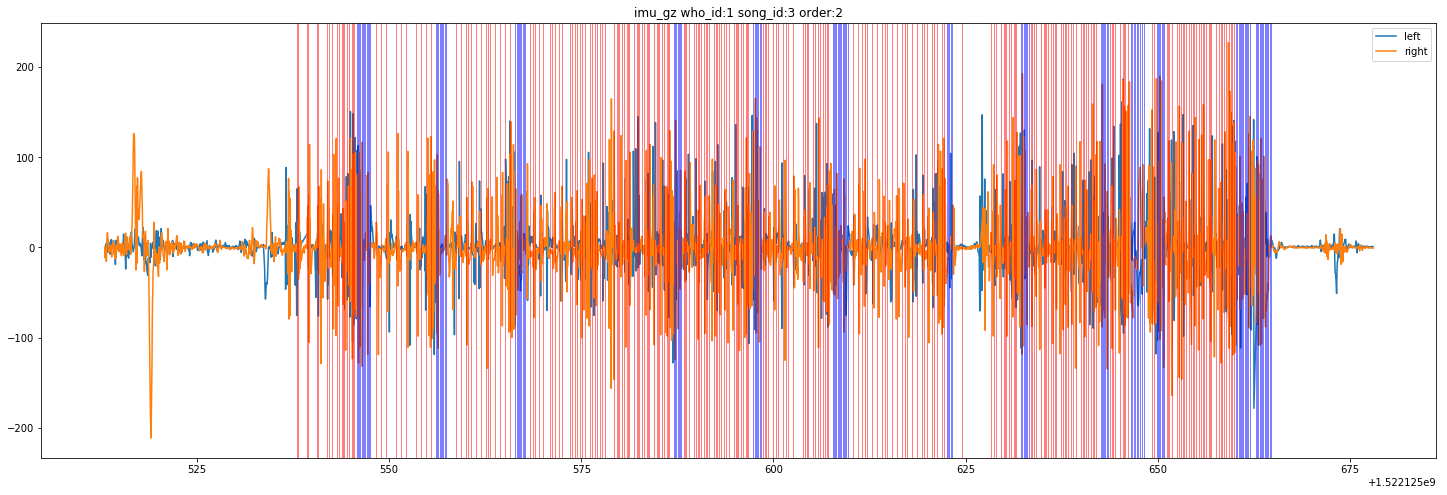

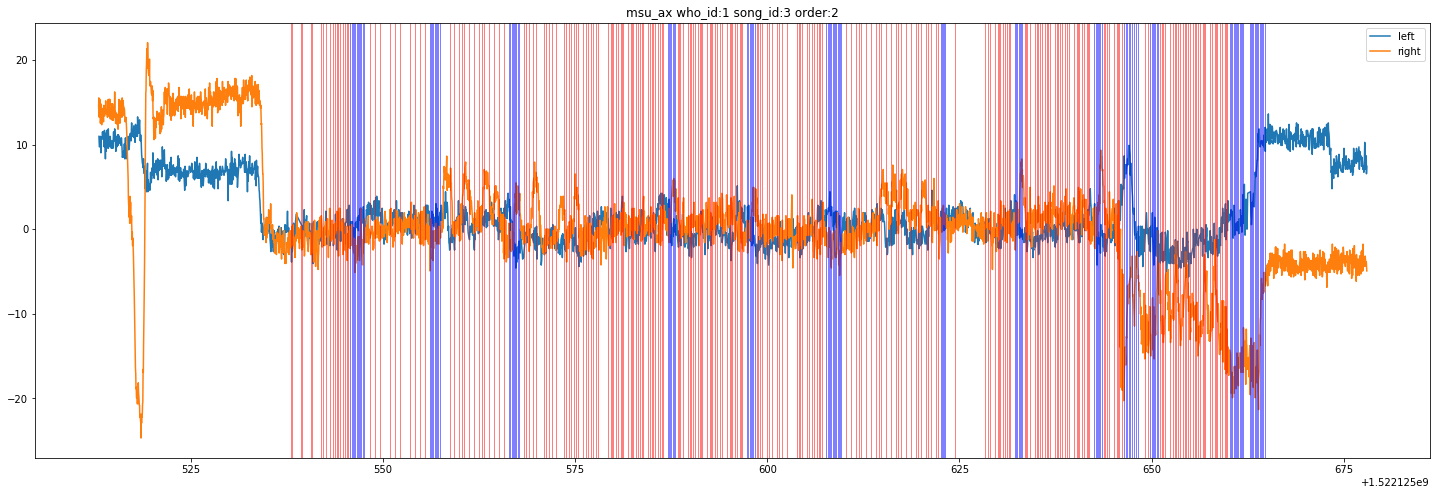

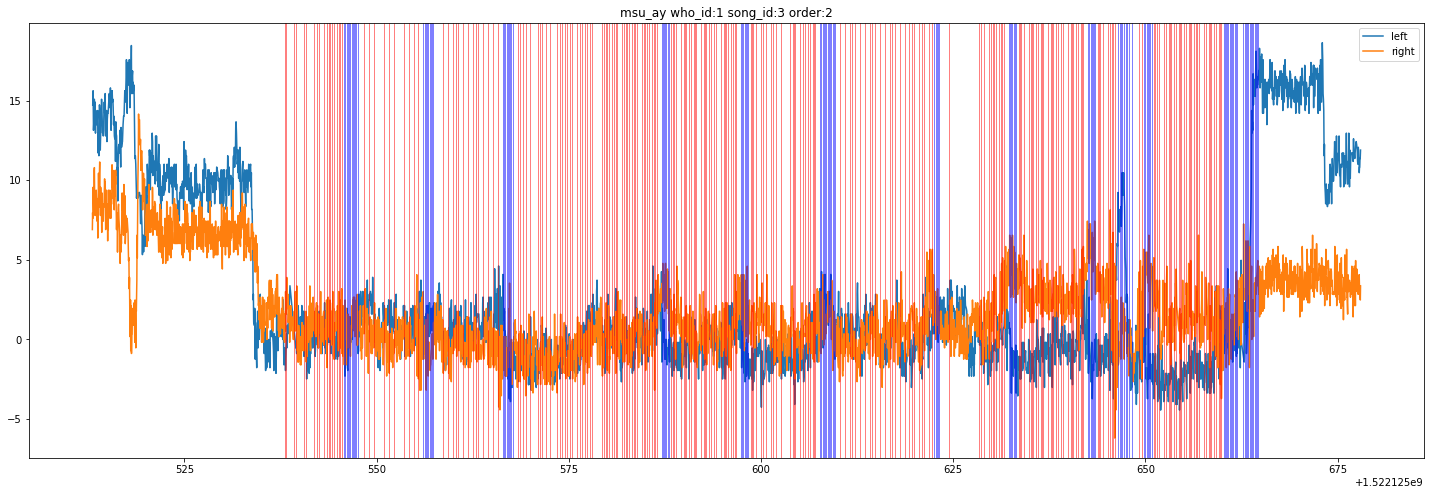

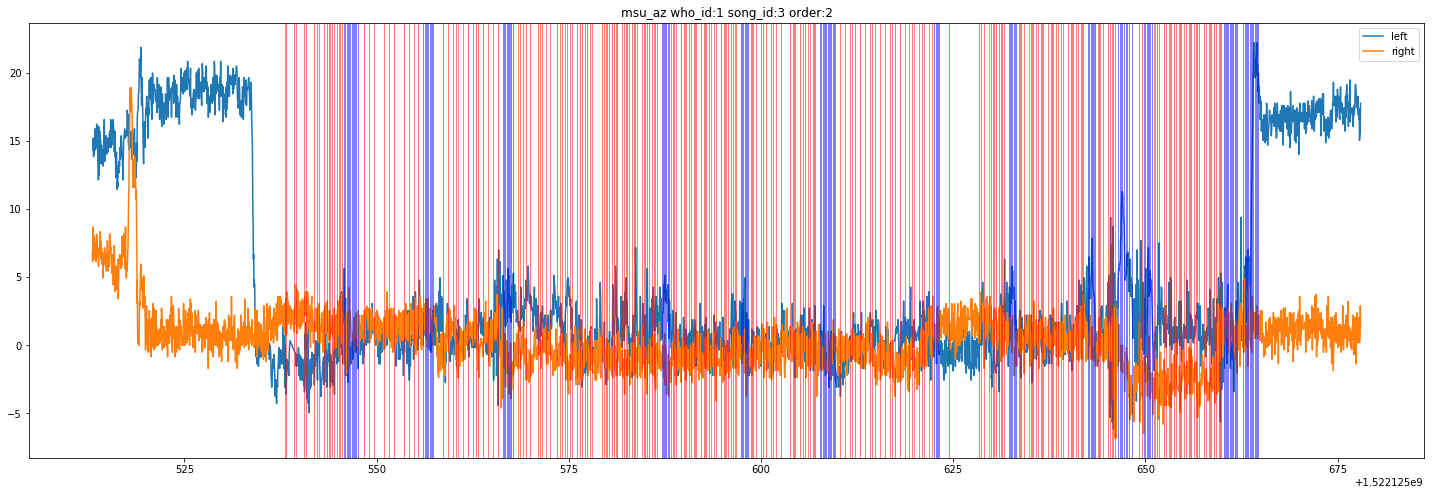

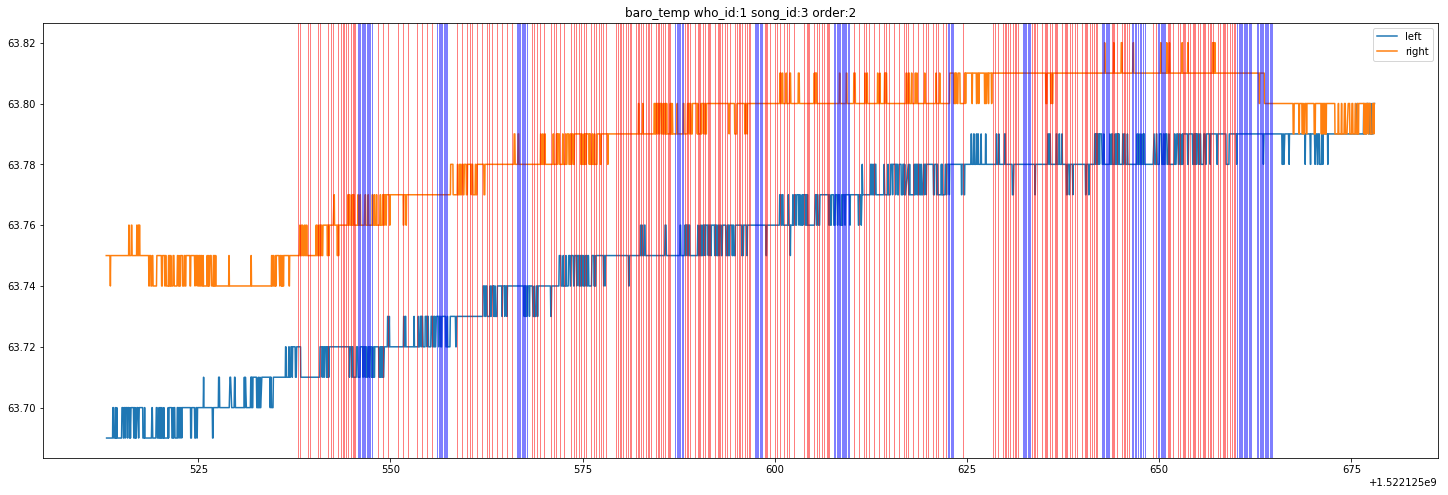

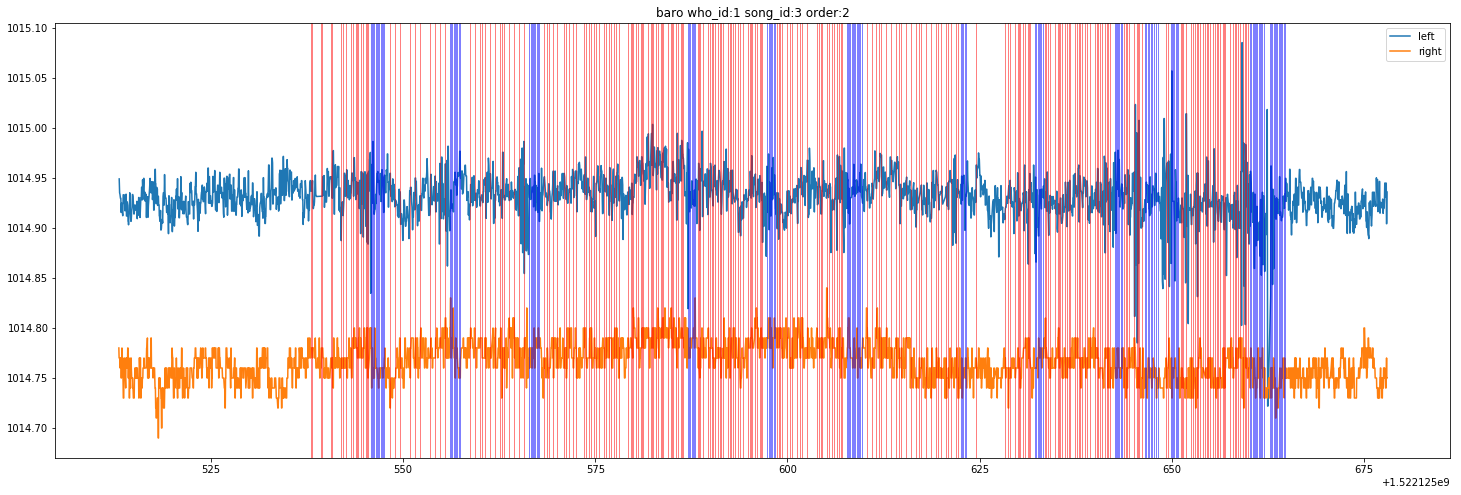

In [6]:
pfs[0][1].plot_global_event()

In [7]:
pfs[0][1].primitive_df

,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,L_MGMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,0.119017,3.114027e-04,0.186500,7.523535,0.515447,11.280000,0.014477,57.119027,0.119017,7.523535,...,0.600000,0.200000,0.400000,0.400000,-0.386609,0.892718,-0.683968,0.566664,0.123069,0.884727
1,0.131963,1.177495e-04,0.174667,7.410933,5.300144,11.529667,0.017532,60.222072,0.132442,6.413972,...,0.250000,0.250000,0.250000,0.250000,-0.924537,0.502464,-0.773736,0.967717,0.984551,0.977345
2,0.139206,1.106815e-05,0.190500,5.567613,2.675143,7.788000,0.019390,33.673457,0.138283,5.431850,...,0.250000,0.250000,0.250000,0.250000,-0.877680,-0.683427,0.249972,0.948992,0.763605,0.840469
3,0.142949,5.376281e-07,0.182333,5.361513,10.190303,7.898667,0.020435,38.936125,0.143182,6.484316,...,0.400000,0.400000,0.400000,0.600000,-0.304257,-0.629867,-0.523380,0.693435,0.481576,0.342396
4,0.134099,1.231997e-04,0.201667,10.592200,5.272287,15.105667,0.018106,117.466980,0.135096,10.259940,...,0.400000,0.600000,0.400000,0.600000,-0.774340,0.930025,-0.525801,0.411368,-0.005803,0.900688
5,0.130452,6.583646e-05,0.178000,6.670885,5.342998,9.663000,0.017084,49.843699,0.125782,7.655104,...,0.250000,0.750000,0.250000,0.750000,-0.991997,-0.703799,0.626415,-0.319281,0.713180,0.330566
6,0.133537,3.432904e-05,0.181600,4.678603,3.345522,6.530800,0.017866,25.234848,0.135107,3.778376,...,0.600000,0.200000,0.400000,0.200000,-0.404198,-0.081742,-0.441936,0.719397,0.391201,0.344024
7,0.142693,1.032949e-04,0.200000,6.252166,4.470115,9.317250,0.020465,43.559691,0.146229,6.078192,...,0.400000,0.200000,0.400000,0.200000,-0.883029,0.546501,-0.870750,0.890167,0.801161,0.797444
8,0.140710,2.065771e-05,0.212667,18.185586,218.228584,27.481667,0.019820,548.944135,0.141947,10.981596,...,0.400000,0.600000,0.400000,0.600000,-0.565638,0.334511,0.545701,0.755570,0.750791,0.452536
9,0.123744,3.740006e-04,0.188667,12.971115,82.240039,19.928000,0.015687,250.489870,0.110300,6.579118,...,0.333333,0.333333,0.333333,0.333333,-0.989800,0.324681,-0.456112,0.981386,0.704287,0.554843


In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

!!!!!!!!! test 1-th drumer !!!!!!!!!!!!
[[ 1.60917697e+00 -4.18069265e-01  1.24481744e+00 ...  1.30109446e+00
  -1.44900710e+00 -1.19169482e-01]
 [ 1.65111047e+00 -4.19698727e-01  1.29235733e+00 ... -9.62074794e-01
   9.81667419e-01 -1.01335455e+00]
 [ 1.65466944e+00 -4.19646129e-01  1.28853228e+00 ... -4.85420218e-01
   3.68185610e-01 -1.04501179e+00]
 ...
 [ 6.14436462e-01 -4.10012597e-01  4.54671638e-01 ... -4.11909821e-02
   7.03605241e-01 -2.89281364e-01]
 [ 6.29831430e-01 -4.16449505e-01  5.50844294e-01 ...  5.45010378e-01
   9.68445535e-04 -6.31911234e-01]
 [ 5.39363108e-01 -4.17801625e-01  4.92375690e-01 ...  6.87913260e-02
   1.17726889e+00  7.66606083e-02]]


100%|██████████| 792/792 [01:10<00:00, 11.29it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:10<00:00, 11.30it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.8030888  0.1969112 ]
 [0.77777778 0.22222222]]


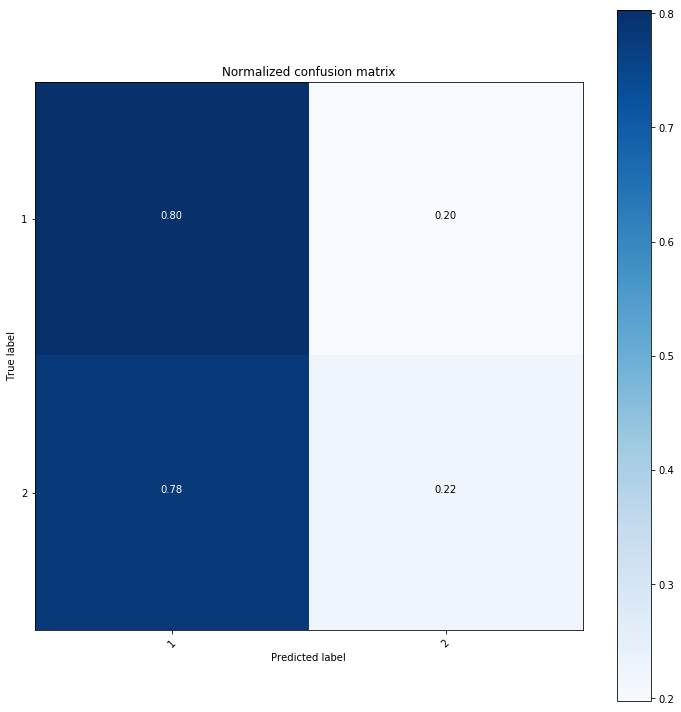

predicting 2 performance


100%|██████████| 792/792 [01:10<00:00, 11.27it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.25096525 0.74903475]
 [0.24786325 0.75213675]]


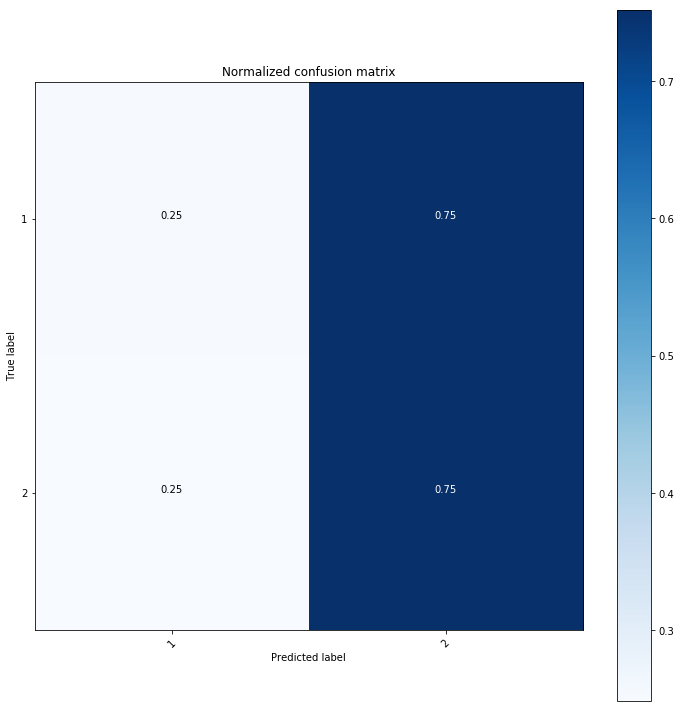

predicting 3 performance


100%|██████████| 792/792 [01:10<00:00, 11.25it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.97683398 0.02316602]
 [0.11111111 0.88888889]]


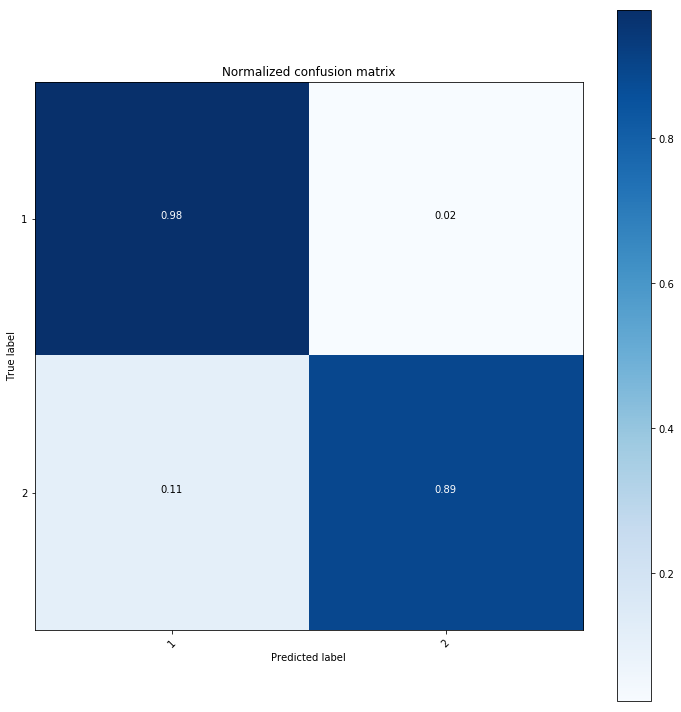

!!!!!!!!! test 2-th drumer !!!!!!!!!!!!
[[ 1.77438834 -0.24358109  1.79763941 ...  0.03832817 -0.85413033
  -1.5752122 ]
 [ 1.78788297 -0.24244753  1.81038146 ...  0.43245615 -1.02962476
  -1.26231609]
 [ 1.75068665 -0.24364944  1.78818563 ...  0.69260266 -1.10967576
  -1.53082396]
 ...
 [ 0.62102362 -0.22980632  0.29202222 ...  0.08457691  0.04630228
  -1.98311043]
 [ 0.48129258 -0.24048222  0.42300502 ...  0.14485504 -0.3287995
  -2.16649222]
 [ 0.56409431 -0.21360042  0.41615446 ...  0.98395508 -1.14304112
  -1.95891524]]


100%|██████████| 792/792 [01:09<00:00, 11.42it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:09<00:00, 11.45it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.06949807 0.93050193]
 [0.09401709 0.90598291]]


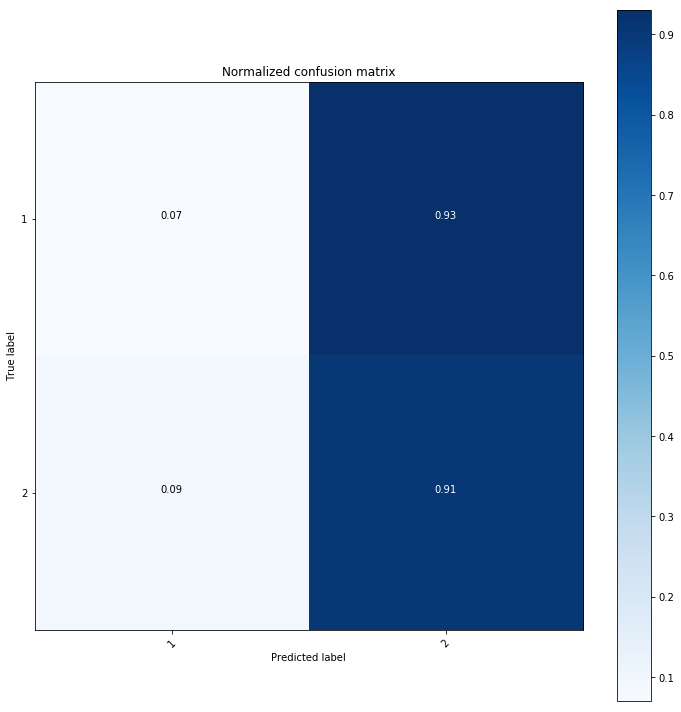

predicting 2 performance


100%|██████████| 792/792 [01:07<00:00, 11.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.81467181 0.18532819]
 [0.58974359 0.41025641]]


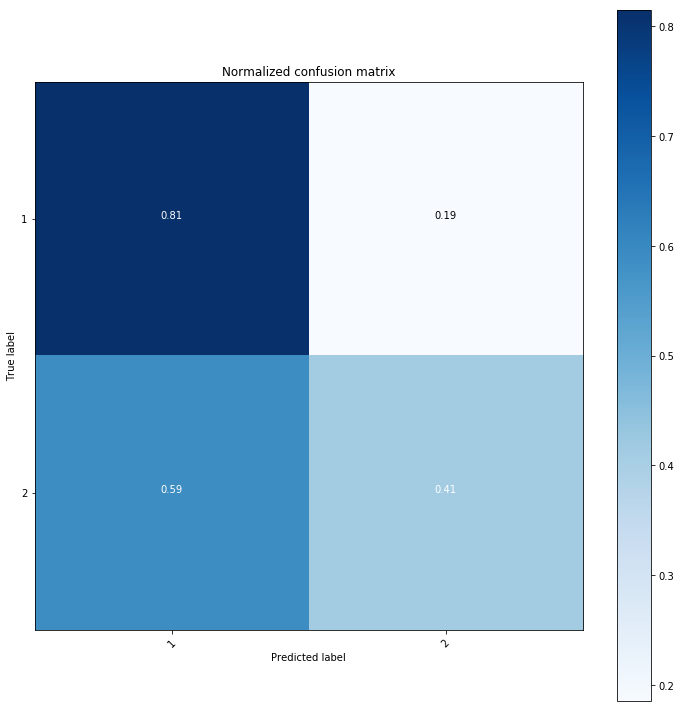

predicting 3 performance


100%|██████████| 792/792 [01:07<00:00, 11.73it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99227799 0.00772201]
 [0.13675214 0.86324786]]


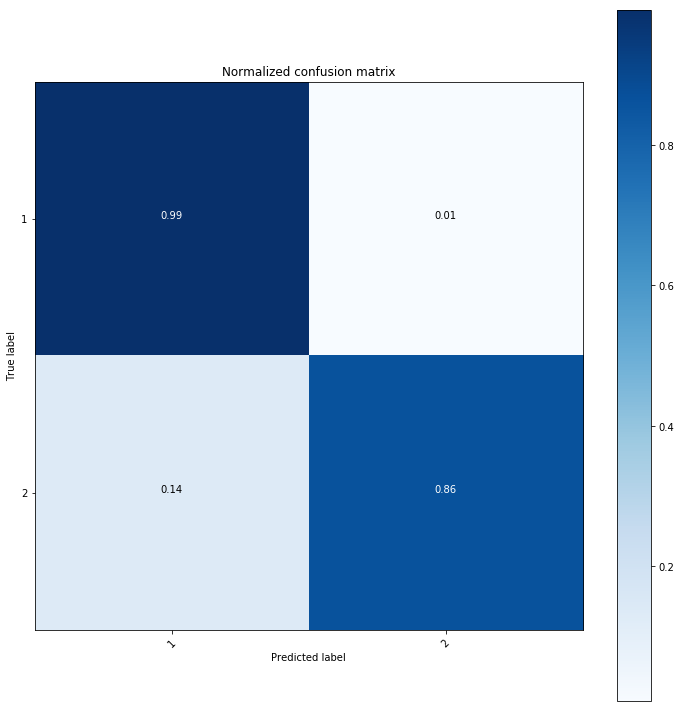

!!!!!!!!! test 3-th drumer !!!!!!!!!!!!
[[ 2.24521295 -0.35659997  2.2766767  ...  0.69128955 -0.1586429
  -1.65318329]
 [ 2.23985671 -0.35653117  2.2710799  ...  1.00141987 -1.17968181
  -0.35802001]
 [ 2.24719454 -0.35611462  2.27990094 ... -1.02569134  0.83334609
  -1.34540715]
 ...
 [ 0.99657828 -0.12864281  0.75796727 ... -0.2714174  -0.23156423
   0.77667177]
 [ 1.19890421 -0.34377139  0.90214566 ... -0.57711839 -0.15792427
  -1.72233834]
 [ 1.21045942 -0.34765043  1.02214223 ...  1.58063482  1.05328539
   0.83688593]]


100%|██████████| 792/792 [01:08<00:00, 11.54it/s]


let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance


100%|██████████| 792/792 [01:06<00:00, 11.88it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.48262548 0.51737452]
 [0.56410256 0.43589744]]


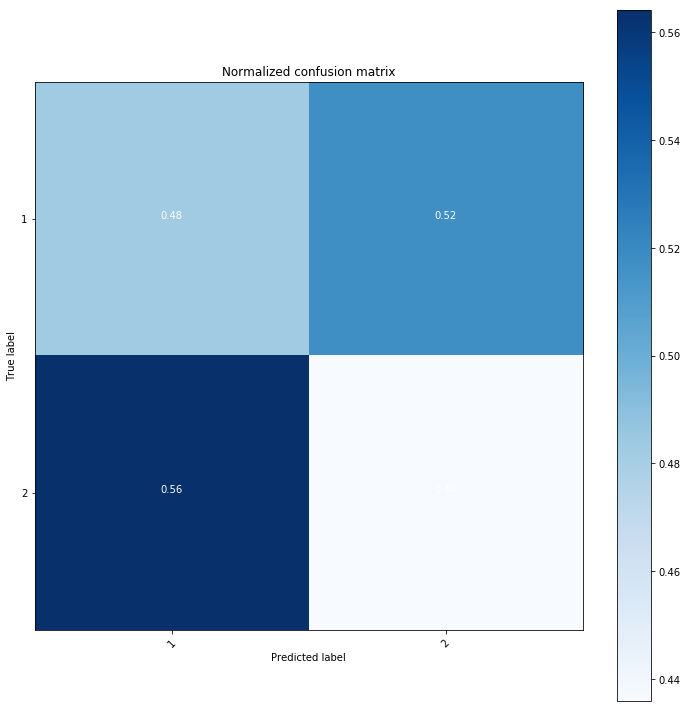

predicting 2 performance


100%|██████████| 792/792 [01:06<00:00, 11.99it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.5019305  0.4980695 ]
 [0.44444444 0.55555556]]


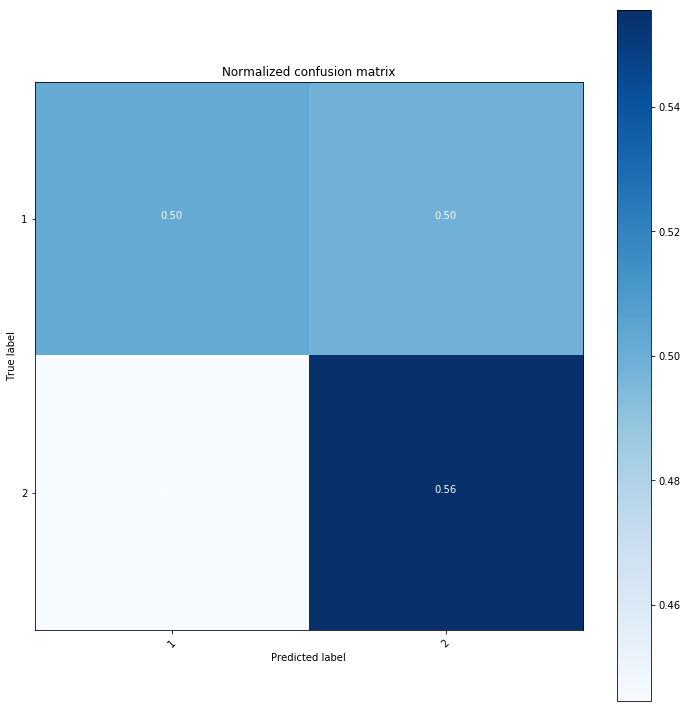

predicting 3 performance


100%|██████████| 792/792 [01:06<00:00, 11.92it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98841699 0.01158301]
 [0.07692308 0.92307692]]


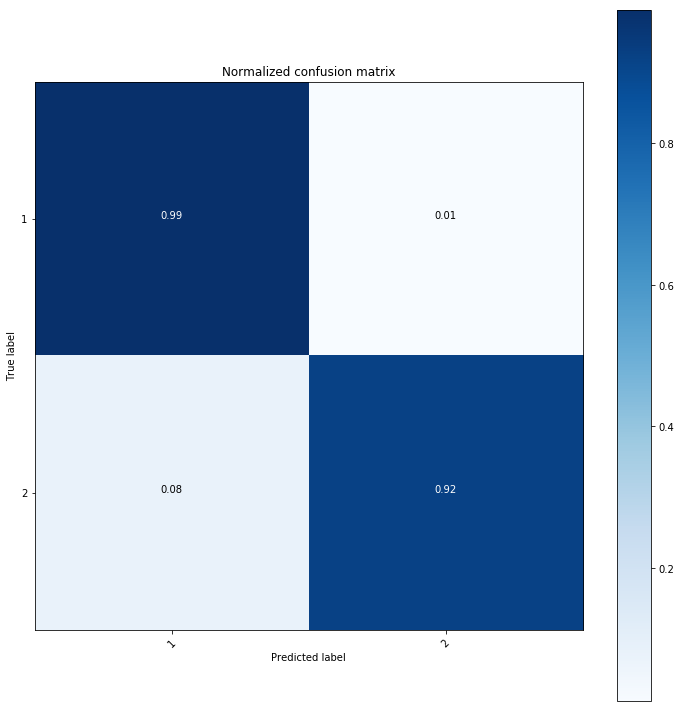

!!!!!!!!! test 4-th drumer !!!!!!!!!!!!
[[-0.77583849 -0.44076452 -0.78218894 ... -0.91684154  0.94355062
  -1.33599199]
 [-0.50011236 -0.44343058 -0.53133299 ...  0.07739771  0.06031125
  -1.63438529]
 [-0.58158527 -0.4353311  -0.60886686 ...  1.1361428  -2.18053682
  -1.80106854]
 ...
 [ 0.16724271 -0.43064619  0.26508293 ...  1.11511085 -0.45940876
  -1.10411638]
 [ 0.21777687 -0.44681346  0.072001   ...  0.80444801  0.93618951
   0.14507087]
 [ 0.78874211 -0.16805824  0.90191457 ... -0.92292308  0.94250764
  -1.32874985]]


100%|██████████| 792/792 [01:06<00:00, 11.99it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:05<00:00, 12.01it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.87644788 0.12355212]
 [0.52136752 0.47863248]]


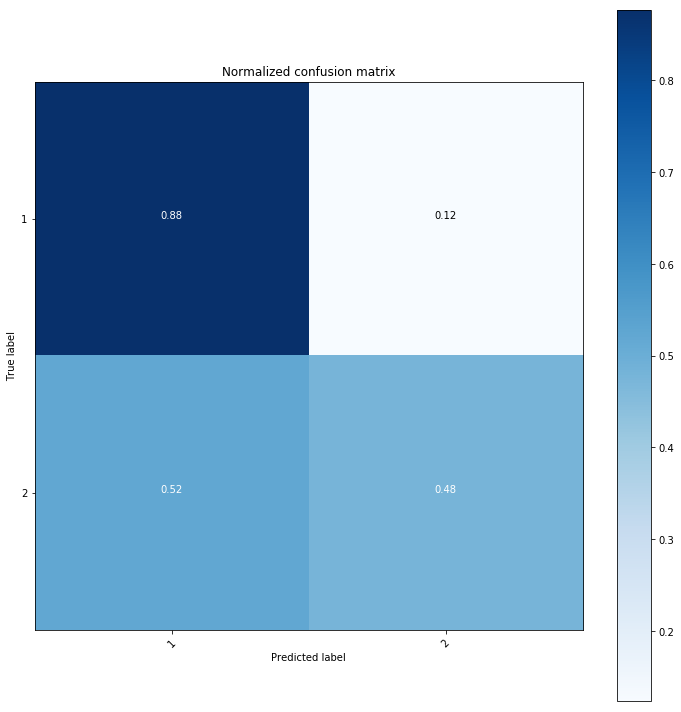

predicting 2 performance


100%|██████████| 792/792 [01:06<00:00, 11.98it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.86872587 0.13127413]
 [0.52991453 0.47008547]]


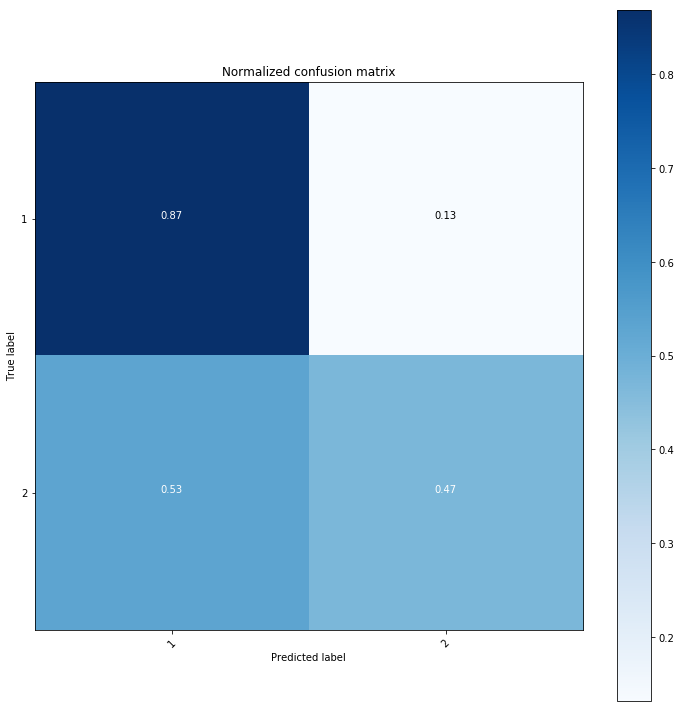

predicting 3 performance


100%|██████████| 792/792 [01:06<00:00, 12.00it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.96525097 0.03474903]
 [0.08547009 0.91452991]]


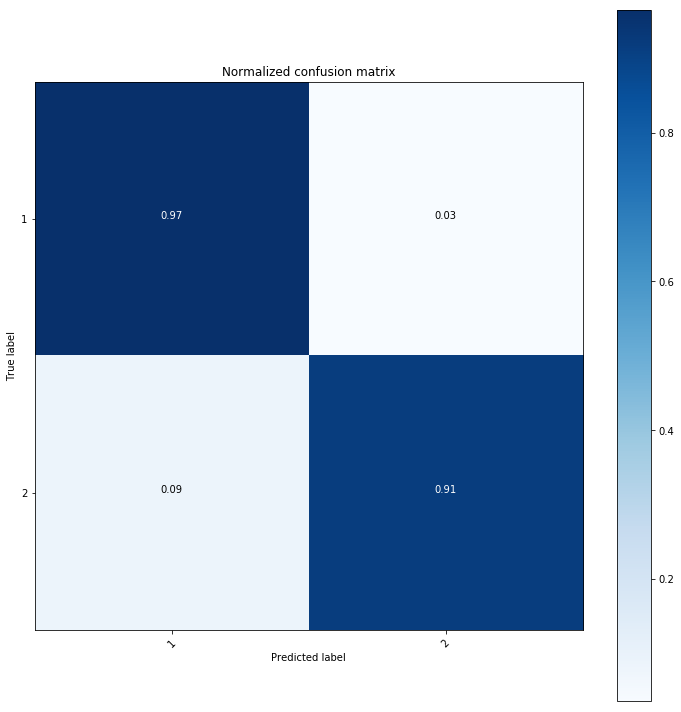

!!!!!!!!! test 5-th drumer !!!!!!!!!!!!
[[-0.62290128 -0.45217123 -0.64237724 ... -1.02781976  1.35470205
  -1.62919195]
 [-0.78170607 -0.43574918 -0.81951879 ...  1.27155897 -0.04307437
   0.29463831]
 [-0.58494795 -0.40600438 -0.63563816 ...  1.43670943 -0.91481563
  -1.63195527]
 ...
 [ 0.72146742  0.23822273  0.44678655 ...  1.01785635 -0.09069206
  -0.20818348]
 [-0.23372285 -0.44723759 -0.27269053 ...  1.60581852  0.1222869
  -0.21695467]
 [ 0.1487544  -0.44453545  0.21829963 ...  1.51151998  1.53381109
   1.08084778]]


100%|██████████| 792/792 [01:06<00:00, 11.93it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:06<00:00, 11.94it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.87258687 0.12741313]
 [0.66666667 0.33333333]]


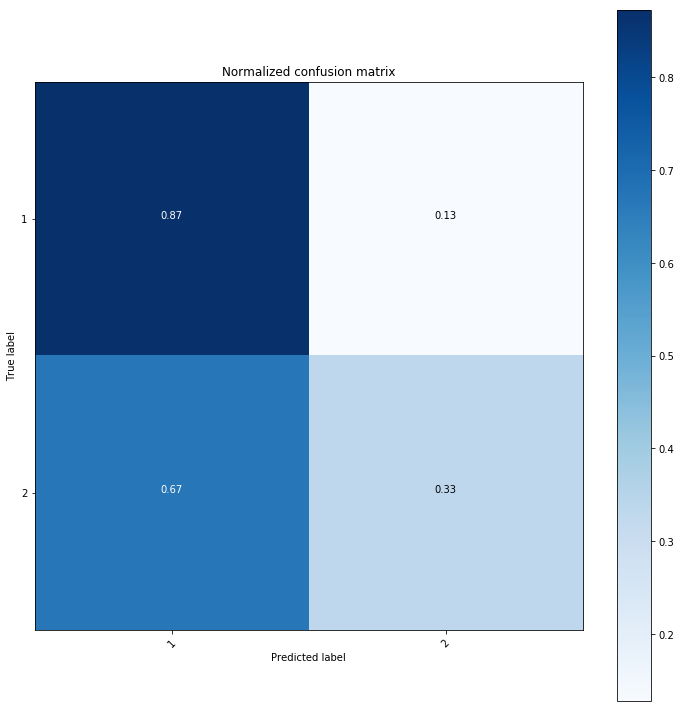

predicting 2 performance


100%|██████████| 792/792 [01:06<00:00, 11.90it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.86100386 0.13899614]
 [0.61538462 0.38461538]]


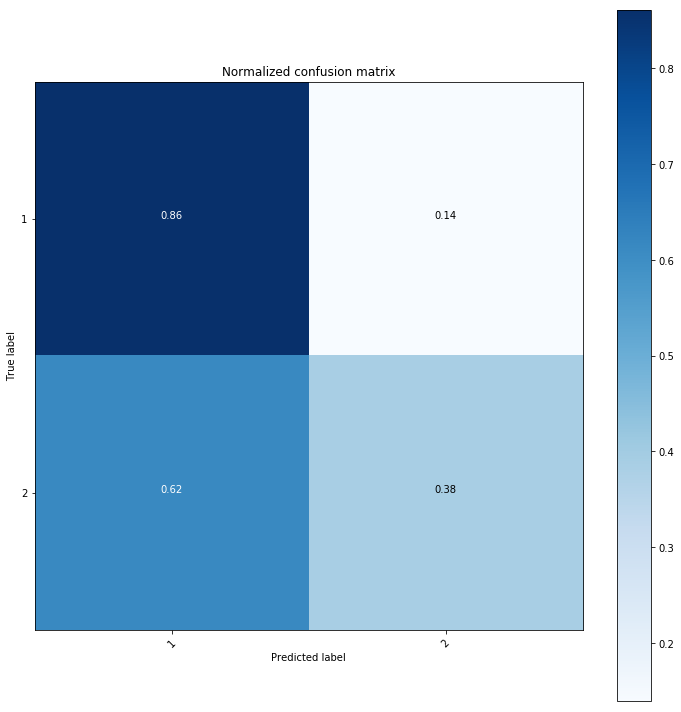

predicting 3 performance


100%|██████████| 792/792 [01:06<00:00, 11.91it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.96525097 0.03474903]
 [0.14529915 0.85470085]]


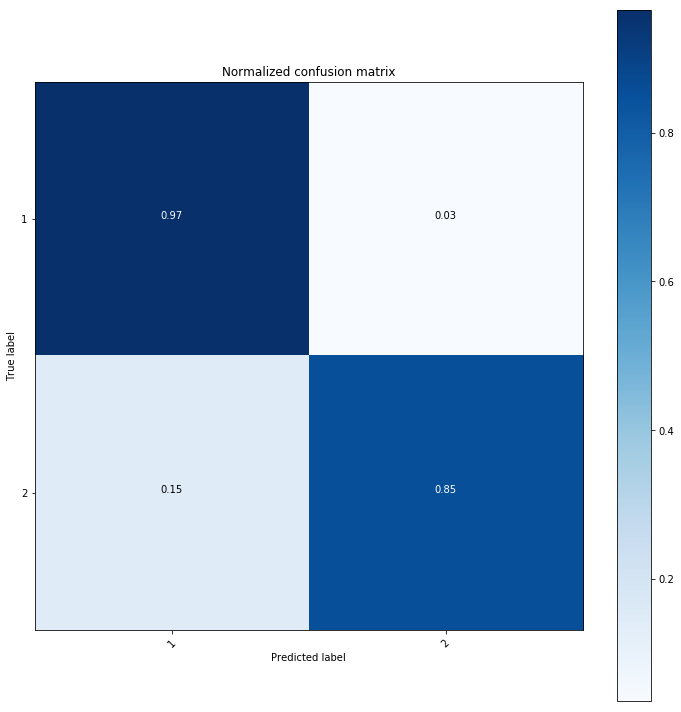

!!!!!!!!! test 6-th drumer !!!!!!!!!!!!
[[-0.28201334 -0.41365377 -0.23823496 ... -0.02802684  0.15605923
   0.15019696]
 [ 0.05795653 -0.38563097  0.10915275 ...  1.41058942  0.98394545
   0.81081552]
 [ 0.03506665 -0.37325568  0.14782105 ... -0.0146942   0.68184546
   0.66148663]
 ...
 [ 0.05886158 -0.41825873  0.2115715  ...  0.47574373  1.12943892
   0.16175075]
 [ 0.05942654 -0.41684445  0.19903043 ... -0.6754069   0.95260441
  -0.21056454]
 [ 0.12499163 -0.40155769  0.25232999 ...  1.25650135  1.18645385
   0.7116626 ]]


100%|██████████| 792/792 [01:06<00:00, 11.94it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:06<00:00, 11.95it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.87258687 0.12741313]
 [0.70940171 0.29059829]]


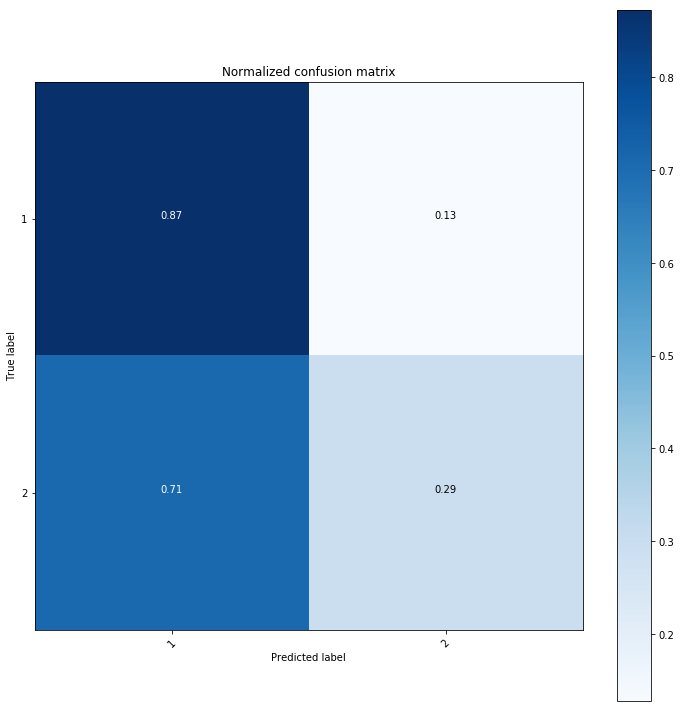

predicting 2 performance


100%|██████████| 792/792 [01:06<00:00, 11.99it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.83783784 0.16216216]
 [0.4957265  0.5042735 ]]


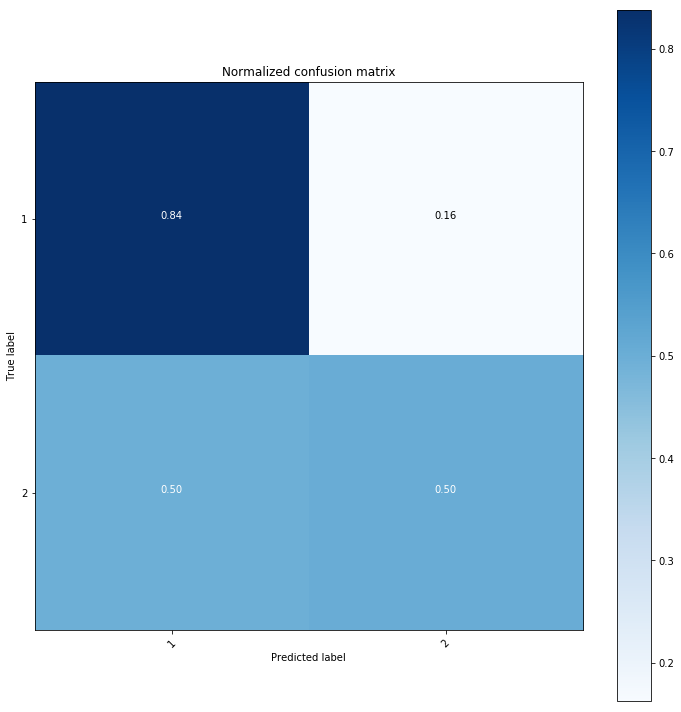

predicting 3 performance


100%|██████████| 792/792 [01:06<00:00, 11.90it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.96525097 0.03474903]
 [0.07692308 0.92307692]]


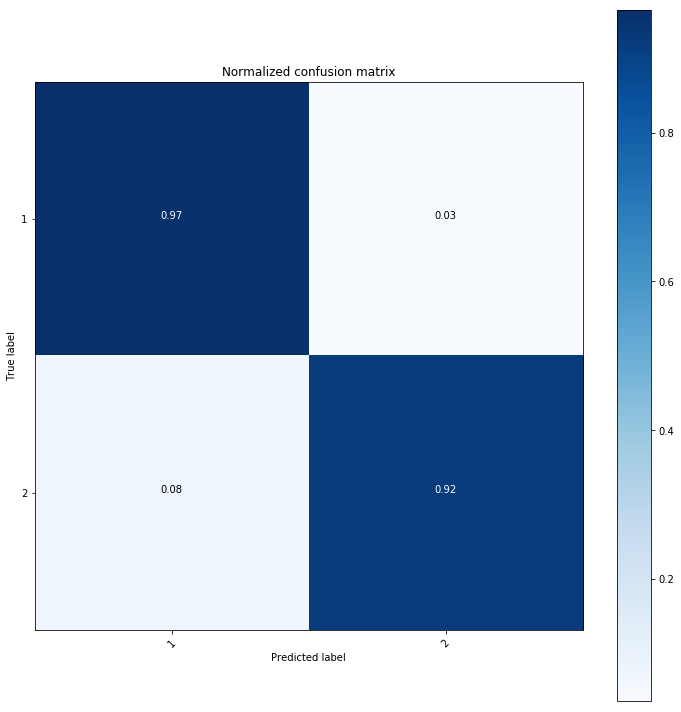

!!!!!!!!! test 7-th drumer !!!!!!!!!!!!
[[-0.06069229 -0.53366575 -0.31904297 ... -1.18926573 -0.81256392
   0.49733692]
 [-0.03564539 -0.53427533 -0.36292636 ...  0.62263746 -0.28125038
   0.87943032]
 [-0.16608778 -0.53337846 -0.41101775 ...  1.68159355  1.28881403
   0.99766261]
 ...
 [-0.72246688 -0.53494409 -0.68032952 ...  0.83202414 -0.12695183
   0.62879724]
 [-0.56588708 -0.53349722 -0.50058796 ... -1.16187472 -1.45955279
   1.00250627]
 [-0.4651333  -0.53174548 -0.34910009 ...  1.57617889  0.66447739
   0.0466619 ]]


100%|██████████| 792/792 [01:06<00:00, 11.94it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:06<00:00, 11.93it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.96138996 0.03861004]
 [0.88888889 0.11111111]]


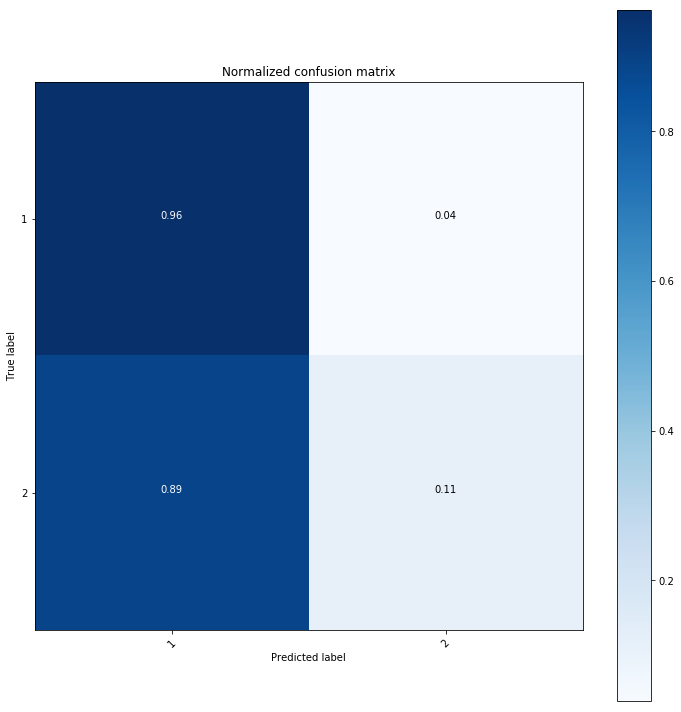

predicting 2 performance


100%|██████████| 792/792 [01:04<00:00, 12.30it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.84169884 0.15830116]
 [0.46153846 0.53846154]]


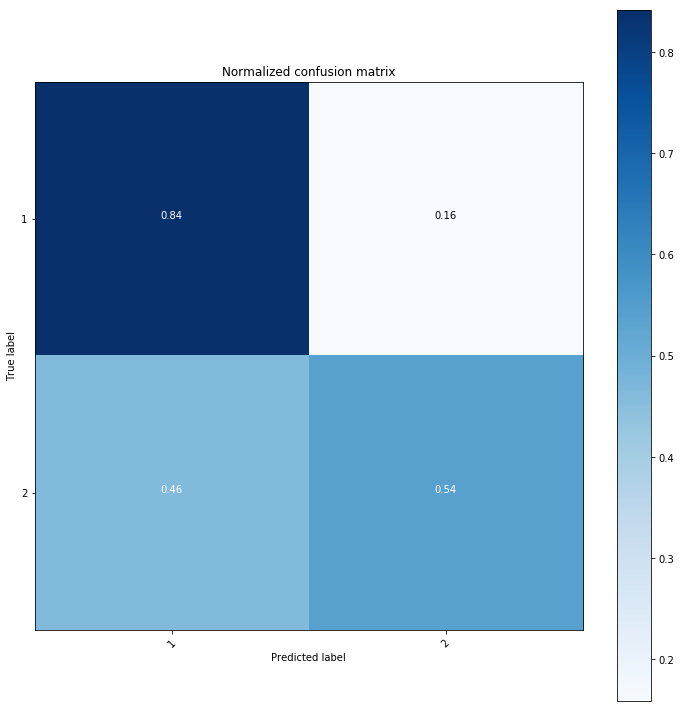

predicting 3 performance


100%|██████████| 792/792 [01:03<00:00, 12.56it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.96911197 0.03088803]
 [0.08547009 0.91452991]]


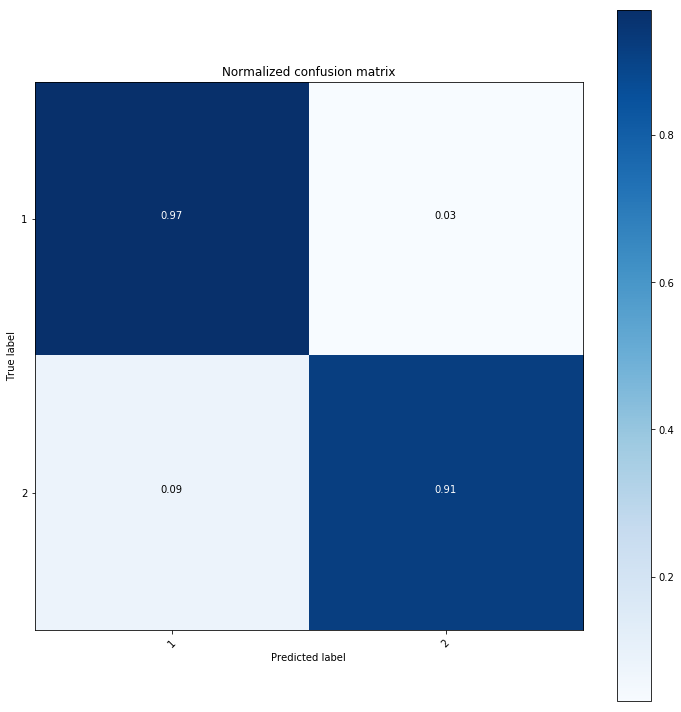

!!!!!!!!! test 8-th drumer !!!!!!!!!!!!
[[-0.25962965 -0.26172947 -0.31647696 ... -0.16673764  0.69951471
  -0.0620388 ]
 [-0.09869129 -0.22753545 -0.19997613 ...  1.01086257 -1.02272291
  -1.49867376]
 [-0.02755848 -0.07998323 -0.06136566 ... -0.21736582 -0.98823249
   1.03877674]
 ...
 [ 3.2757619  -0.26157694  3.48179008 ... -0.15375452 -0.79406665
   0.59523   ]
 [ 3.23705138 -0.26285344  3.4572994  ... -0.95642185 -1.24432312
   0.55958788]
 [ 3.24997436 -0.26106879  3.49913765 ... -0.96052015 -1.38953881
   1.02828457]]


100%|██████████| 792/792 [01:03<00:00, 12.57it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:03<00:00, 12.56it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.05019305 0.94980695]
 [0.1025641  0.8974359 ]]


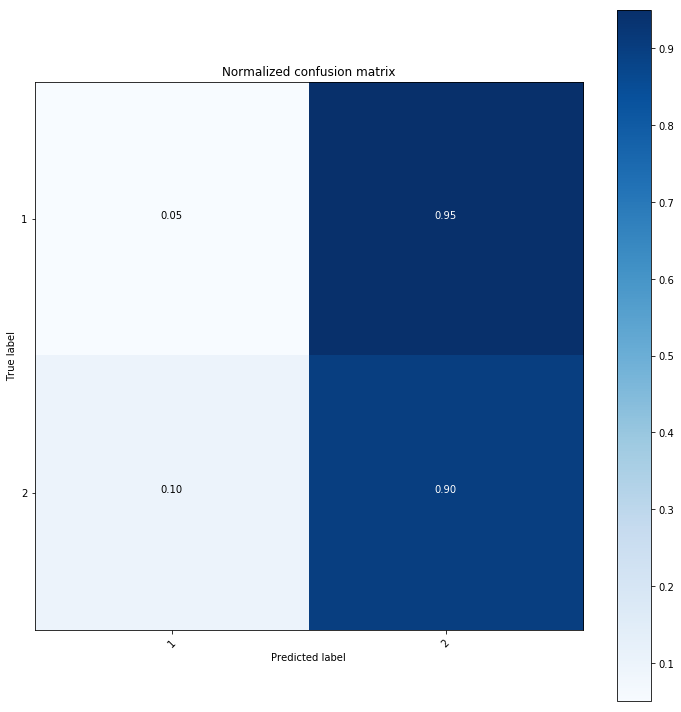

predicting 2 performance


100%|██████████| 792/792 [01:02<00:00, 12.59it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.94980695 0.05019305]
 [0.85470085 0.14529915]]


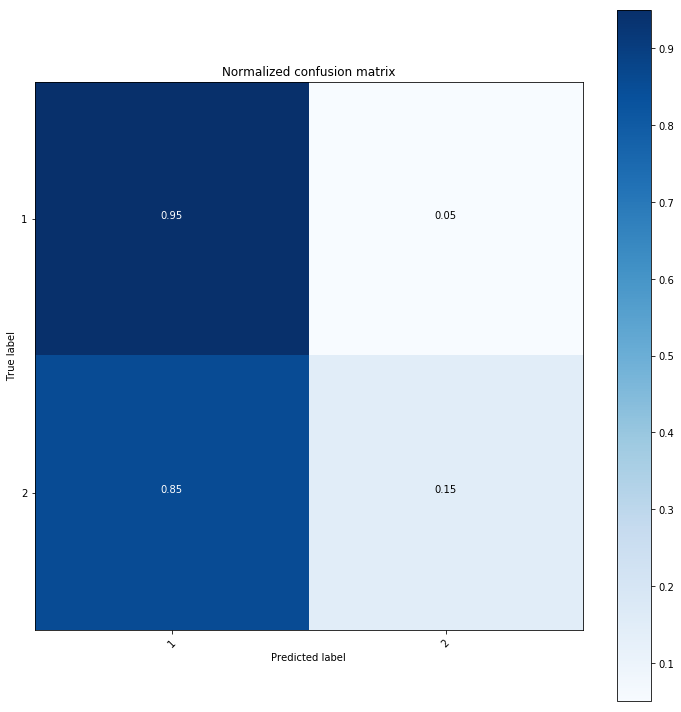

predicting 3 performance


100%|██████████| 792/792 [01:02<00:00, 12.57it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.996139   0.003861  ]
 [0.13675214 0.86324786]]


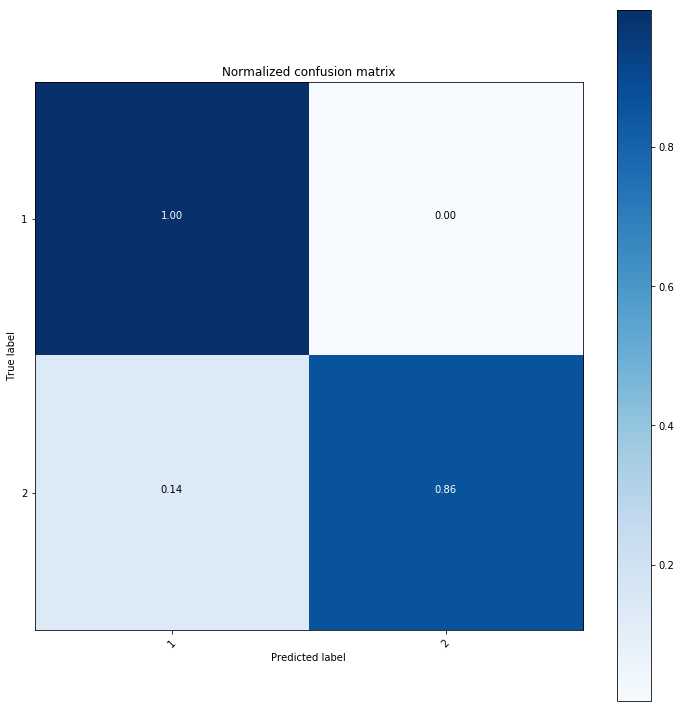

In [9]:
k = 50
C = 100

for drumer in range(1, 8 + 1):
    print('!!!!!!!!! test %d-th drumer !!!!!!!!!!!!' % drumer)
    model = Model(k_centroid=k, tolerance=C)
    model.fit(pfs[drumer - 1][TRAIN_ORDER - 1])
    print('let\'s go centroid=%d, C=%.2f @@@@@@@@@@@@@@@' % (k, C))
    for od in range(len(pfs[drumer - 1])):
        print('predicting %d performance' % (od + 1))
        pred_y, y = model.predict(pfs[drumer - 1][od])
        print('============ prediction arm ============')
        cutstom_output_cnf_matrix(y, pred_y)